In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from anomaly_detection import anomaly_detect_ts as tad
import numpy as np

#ts = pd.read_csv('score.csv').set_index('timestamp')['count']
ts = pd.read_csv('./data/权力的游戏/record_10_new.txt',sep='\t',index_col=0,names=["timestamp","groundtruth","predict","edit1","edit2","proportion","recall","accuracy","recall_1","recall_2","tpfp","tnfn"])
ts.index = ['2019-'+date for date in ts.index]
ts.index = ts.index.astype('datetime64[ns]')
ts.head()

,groundtruth,predict,edit1,edit2,proportion,recall,accuracy,recall_1,recall_2,tpfp,tnfn
2019-04-01,0,1664,2074.767219,2108.774194,2248,0.902174,0.903226,0.902174,1.00000,83,10
2019-04-02,0,1649,2098.066667,2159.525581,2313,0.875000,0.860000,0.875000,0.50000,86,14
2019-04-03,0,744,899.260879,1239.264640,1598,0.825243,0.802817,0.825243,0.74359,95,47
2019-04-04,0,742,1951.049180,1445.213115,1029,0.725490,0.770492,0.725490,1.00000,37,24
2019-04-05,0,536,779.300000,783.477419,790,0.833333,0.825000,0.833333,0.75000,31,9


In [2]:
edit_ts = ts['edit2'].iloc[15:28]
edit_ts.head()

2019-04-16    1487.548718
2019-04-17    1275.229167
2019-04-18    1901.315789
2019-04-19    1045.966102
2019-04-20     790.807473
Name: edit2, dtype: float64

In [3]:
predict_ts = ts['predict'].iloc[15:28]
predict_ts

2019-04-16    1086
2019-04-17     832
2019-04-18    1445
2019-04-19     848
2019-04-20     682
2019-04-21    1943
2019-04-22    1059
2019-04-23     396
2019-04-24     164
2019-04-25     158
2019-04-26     191
2019-04-27     327
2019-04-28     125
Name: predict, dtype: int64

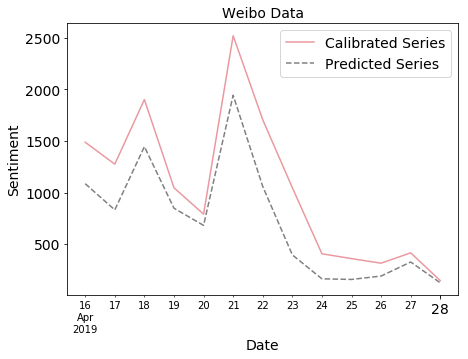

In [4]:
fig, ax = plt.subplots(1, figsize=(7,5))
#diata.plot(ax=ax[0],label="Diata")
edit_ts.plot(use_index=True,ax=ax,label="Calibrated Series",color="#EA99A0")
predict_ts.plot(ax=ax,label="Predicted Series",color="grey",ls='--')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Sentiment',fontsize=14)
ax.set_title('Weibo Data',fontsize=14);
ax.legend(fontsize=14)
plt.show()

[Timestamp('2019-04-21 00:00:00'), Timestamp('2019-04-21 00:00:00')]
                  edit2
2019-04-21  2519.563934
2019-04-21  2519.563934


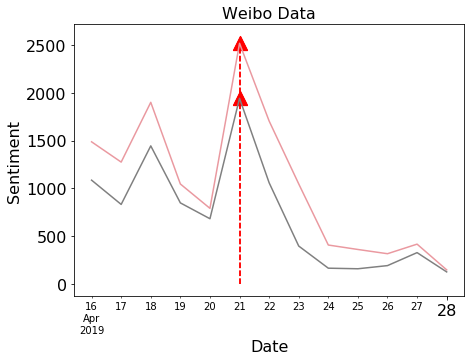

In [7]:
fig, ax2 = plt.subplots(1, figsize=(7,5))
#diata.plot(ax=ax[0],label="Diata")
edit_ts.plot(use_index=True,ax=ax2,label="Calibrated Series",color="#EA99A0")
predict_ts.plot(ax=ax2,label="Predicted Series",color="grey")


df = pd.DataFrame(edit_ts)
predict_df = pd.DataFrame(predict_ts)
ground_truth_index = [5,5]
ground_truth = [df.index[i] for i in ground_truth_index]
print(ground_truth)
groundtruth_points = pd.DataFrame(df[['edit2']].loc[ground_truth].sort_index())
predict_points = pd.DataFrame(predict_df[['predict']].loc[ground_truth].sort_index())
print(groundtruth_points)

ax2.scatter(groundtruth_points.index,groundtruth_points.iloc[:,0],s=200,color='r',marker='^')
ax2.scatter(predict_points.index,predict_points.iloc[:,0],s=200,color='r',marker='^')



plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#predict_ts.plot(ax=ax,label="Predicted Series",color="grey",ls='--')
plt.vlines(groundtruth_points.index, 0, groundtruth_points.iloc[:,0], colors = "r", linestyles = "dashed")
ax2.set_xlabel('Date',fontsize=16)
ax2.set_ylabel('Sentiment',fontsize=16)
ax2.set_title('Weibo Data',fontsize=16)
#ax2.legend(fontsize=16)
plt.show()